Given n non-negative integers representing an elevation map where the width of each bar is 1, compute how much water it can trap after raining.

 

Example 1:

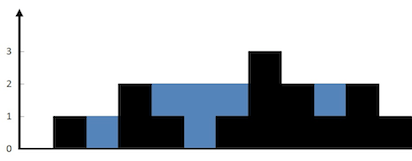

Input: height = [0,1,0,2,1,0,1,3,2,1,2,1]
Output: 6
Explanation: The above elevation map (black section) is represented by array [0,1,0,2,1,0,1,3,2,1,2,1]. In this case, 6 units of rain water (blue section) are being trapped.

Example 2:

Input: height = [4,2,0,3,2,5]
Output: 9

 

Constraints:

    n == height.length
    1 <= n <= 2 * 104
    0 <= height[i] <= 105



In [12]:
from typing import List

class Solution:
    def trap(self, height: List[int]) -> int:
        max_height = max(height)
        height = [0] + height + [0]
        
        left_max = [0 for _ in range(len(height))]
        right_max = [0 for _ in range(len(height))]
        for i in range(1, len(height)):
            left_max[i] = max(left_max[i - 1], height[i])
        for i in range(len(height) - 1)[::-1]:
            right_max[i] = max(right_max[i + 1], height[i])
            
        ans = 0
        for i, height in enumerate(height):
            ans += min(left_max[i], right_max[i]) - height
        return ans

In [15]:
class Solution:
    def trap(self, height: List[int]) -> int:
        walls = {}
        dec_mono_stack = []
        
        for i, v in enumerate(height):
            while dec_mono_stack and v > height[dec_mono_stack[-1]]:
                mid_index = dec_mono_stack.pop()
                if not dec_mono_stack:
                    # no left wall, can't trap
                    break
                left_wall_i = dec_mono_stack[-1]
                right_wall_i = i
                height_val = min(height[left_wall_i], height[right_wall_i]) - height[mid_index]
                walls[(left_wall_i, right_wall_i)] = height_val * (right_wall_i - left_wall_i - 1)
                
            dec_mono_stack.append(i)
                
        return sum(walls.values())

In [21]:
s = Solution()
s.trap([0,1,0,2,1,0,1,3,2,1,2,1])

[]


In [17]:
s.trap([4,2,0,3,2,5])

9